# The Robert and Rosenbaum Uncertainty Zones model

# An application to EURUSD FX Futures at CME

## Implementation by
## Marcos Costa Santos Carreira (École Polytechnique - CMAP)
## and
## Florian Huchedé (CME)
## Aug-2019

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import glob

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.set_option('display.max_rows', 200)

In [4]:
import cme_processing as cme

## File paths and initial values

In [5]:
PATHPROJ = '/Users/marcoscscarreira/Documents/X/CME project/CME_data/'
#URL_ROOT = 'https://raw.githubusercontent.com/MarcosCarreira/UZStats/master/CME_data/'

In [6]:
CURR = 'EUR'

In [7]:
PATH_PRIOR = PATHPROJ+CURR+'/prior/'
PATH_AFTER = PATHPROJ+CURR+'/after/'
URL_1 = CURR+'/prior/'
URL_2 = CURR+'/after/'
#PATH_PRIOR = URL_ROOT+URL_EUR_1
#PATH_AFTER = URL_ROOT+URL_EUR_2

In [8]:
TRADING_HOURS = 9

In [9]:
TICK_PRIOR = 1.0
TICK_AFTER = 0.5

In [10]:
PRIOR_CDATES_LIST = [['6EU5', '20150615'], ['6EU5', '20150616'], ['6EU5', '20150617'],\
    ['6EU5', '20150618'], ['6EU5', '20150619'], ['6EU5', '20150622'], ['6EU5', '20150623'],\
    ['6EU5', '20150624'], ['6EU5', '20150625'], ['6EU5', '20150626'], ['6EU5', '20150629'],\
    ['6EU5', '20150630'], ['6EU5', '20150701'], ['6EU5', '20150702'], ['6EU5', '20150703'],\
    ['6EU5', '20150706'], ['6EU5', '20150707'], ['6EU5', '20150708'], ['6EU5', '20150709'],\
    ['6EU5', '20150710'], ['6EU5', '20150713'], ['6EU5', '20150714'], ['6EU5', '20150715'],\
    ['6EU5', '20150716'], ['6EU5', '20150717'], ['6EU5', '20150720'], ['6EU5', '20150721'],\
    ['6EU5', '20150722'], ['6EU5', '20150723'], ['6EU5', '20150724'], ['6EU5', '20150727'],\
    ['6EU5', '20150728'], ['6EU5', '20150729'], ['6EU5', '20150730'], ['6EU5', '20150731'],\
    ['6EU5', '20150803'], ['6EU5', '20150804'], ['6EU5', '20150805'], ['6EU5', '20150806'],\
    ['6EU5', '20150807'], ['6EU5', '20150810'], ['6EU5', '20150811'], ['6EU5', '20150812'],\
    ['6EU5', '20150813'], ['6EU5', '20150814'], ['6EU5', '20150817'], ['6EU5', '20150818'],\
    ['6EU5', '20150819'], ['6EU5', '20150820'], ['6EU5', '20150821'], ['6EU5', '20150824'],\
    ['6EU5', '20150825'], ['6EU5', '20150826'], ['6EU5', '20150827'], ['6EU5', '20150828'],\
    ['6EU5', '20150831'], ['6EU5', '20150901'], ['6EU5', '20150902'], ['6EU5', '20150903'],\
    ['6EU5', '20150904'], ['6EU5', '20150907'], ['6EU5', '20150908'], ['6EU5', '20150909'],\
    ['6EU5', '20150910'], ['6EU5', '20150911'], ['6EZ5', '20150914'], ['6EZ5', '20150915'],\
    ['6EZ5', '20150916'], ['6EZ5', '20150917'], ['6EZ5', '20150918'], ['6EZ5', '20150921'],\
    ['6EZ5', '20150922'], ['6EZ5', '20150923'], ['6EZ5', '20150924'], ['6EZ5', '20150925'],\
    ['6EZ5', '20150928'], ['6EZ5', '20150929'], ['6EZ5', '20150930'], ['6EZ5', '20151001'],\
    ['6EZ5', '20151002'], ['6EZ5', '20151005'], ['6EZ5', '20151006'], ['6EZ5', '20151007'],\
    ['6EZ5', '20151008'], ['6EZ5', '20151009'], ['6EZ5', '20151012'], ['6EZ5', '20151013'],\
    ['6EZ5', '20151014'], ['6EZ5', '20151015'], ['6EZ5', '20151016'], ['6EZ5', '20151019'],\
    ['6EZ5', '20151020'], ['6EZ5', '20151021'], ['6EZ5', '20151022'], ['6EZ5', '20151023'],\
    ['6EZ5', '20151026'], ['6EZ5', '20151027'], ['6EZ5', '20151028'], ['6EZ5', '20151029'],\
    ['6EZ5', '20151030'], ['6EZ5', '20151102'], ['6EZ5', '20151103'], ['6EZ5', '20151104'],\
    ['6EZ5', '20151105'], ['6EZ5', '20151106'], ['6EZ5', '20151109'], ['6EZ5', '20151110'],\
    ['6EZ5', '20151111'], ['6EZ5', '20151112'], ['6EZ5', '20151113'], ['6EZ5', '20151116'],\
    ['6EZ5', '20151117'], ['6EZ5', '20151118'], ['6EZ5', '20151119'], ['6EZ5', '20151120'],\
    ['6EZ5', '20151123'], ['6EZ5', '20151124'], ['6EZ5', '20151125'], ['6EZ5', '20151126'],\
    ['6EZ5', '20151127'], ['6EZ5', '20151130'], ['6EZ5', '20151201'], ['6EZ5', '20151202'],\
    ['6EZ5', '20151203'], ['6EZ5', '20151204'], ['6EZ5', '20151207'], ['6EZ5', '20151208'],\
    ['6EZ5', '20151209'], ['6EZ5', '20151210'], ['6EZ5', '20151211'], ['x6EH6', '20151214'],\
    ['x6EH6', '20151215'], ['x6EH6', '20151216'], ['x6EH6', '20151217'], ['x6EH6', '20151218'],\
    ['x6EH6', '20151221'], ['x6EH6', '20151222'], ['x6EH6', '20151223'], ['x6EH6', '20160104'],\
    ['x6EH6', '20160105'], ['x6EH6', '20160106'], ['x6EH6', '20160107'], ['x6EH6', '20160108']]

In [11]:
AFTER_CDATES_LIST = [['x6EH6', '20160111'], ['x6EH6', '20160112'], ['x6EH6', '20160113'],\
    ['x6EH6', '20160114'], ['x6EH6', '20160115'], ['x6EH6', '20160118'], ['x6EH6', '20160119'],\
    ['x6EH6', '20160120'], ['x6EH6', '20160121'], ['x6EH6', '20160122'], ['x6EH6', '20160125'],\
    ['x6EH6', '20160126'], ['x6EH6', '20160127'], ['x6EH6', '20160128'], ['x6EH6', '20160129'],\
    ['x6EH6', '20160201'], ['x6EH6', '20160202'], ['x6EH6', '20160203'], ['x6EH6', '20160204'],\
    ['x6EH6', '20160205'], ['x6EH6', '20160208'], ['x6EH6', '20160209'], ['x6EH6', '20160210'],\
    ['x6EH6', '20160211'], ['x6EH6', '20160212'], ['x6EH6', '20160215'], ['x6EH6', '20160216'],\
    ['x6EH6', '20160217'], ['x6EH6', '20160218'], ['x6EH6', '20160219'], ['x6EH6', '20160222'],\
    ['x6EH6', '20160223'], ['x6EH6', '20160224'], ['x6EH6', '20160225'], ['x6EH6', '20160226'],\
    ['x6EH6', '20160229'], ['x6EH6', '20160301'], ['x6EH6', '20160302'], ['x6EH6', '20160303'],\
    ['x6EH6', '20160304'], ['x6EH6', '20160307'], ['x6EH6', '20160308'], ['x6EH6', '20160309'],\
    ['x6EH6', '20160310'], ['x6EH6', '20160311'], ['x6EM6', '20160314'], ['x6EM6', '20160315'],\
    ['x6EM6', '20160316'], ['x6EM6', '20160317'], ['x6EM6', '20160318'], ['x6EM6', '20160321'],\
    ['x6EM6', '20160322'], ['x6EM6', '20160323'], ['x6EM6', '20160324'], ['x6EM6', '20160328'],\
    ['x6EM6', '20160329'], ['x6EM6', '20160330'], ['x6EM6', '20160331'], ['x6EM6', '20160401'],\
    ['x6EM6', '20160404'], ['x6EM6', '20160405'], ['x6EM6', '20160406'], ['x6EM6', '20160407'],\
    ['x6EM6', '20160408'], ['x6EM6', '20160411'], ['x6EM6', '20160412'], ['x6EM6', '20160413'],\
    ['x6EM6', '20160414'], ['x6EM6', '20160415'], ['x6EM6', '20160418'], ['x6EM6', '20160419'],\
    ['x6EM6', '20160420'], ['x6EM6', '20160421'], ['x6EM6', '20160422'], ['x6EM6', '20160425'],\
    ['x6EM6', '20160426'], ['x6EM6', '20160427'], ['x6EM6', '20160428'], ['x6EM6', '20160429'],\
    ['x6EM6', '20160502'], ['x6EM6', '20160503'], ['x6EM6', '20160504'], ['x6EM6', '20160505'],\
    ['x6EM6', '20160506'], ['x6EM6', '20160509'], ['x6EM6', '20160510'], ['x6EM6', '20160511'],\
    ['x6EM6', '20160512'], ['x6EM6', '20160513'], ['x6EM6', '20160516'], ['x6EM6', '20160517'],\
    ['x6EM6', '20160518'], ['x6EM6', '20160519'], ['x6EM6', '20160520'], ['x6EM6', '20160523'],\
    ['x6EM6', '20160524'], ['x6EM6', '20160525'], ['x6EM6', '20160526'], ['x6EM6', '20160527'],\
    ['x6EM6', '20160530'], ['x6EM6', '20160531'], ['x6EM6', '20160601'], ['x6EM6', '20160602'],\
    ['x6EM6', '20160603'], ['x6EM6', '20160606'], ['x6EM6', '20160607'], ['x6EM6', '20160608'],\
    ['x6EM6', '20160609'], ['x6EM6', '20160610']]

### Processing files

#### Prior

In [12]:
#PRIOR_CDATES_LIST = cme.list_files(PATH_PRIOR)

In [13]:
#PRIOR_CDATES_LIST

In [14]:
PRIOR_CDATES, FILES_PRIOR_CAticks, FILES_PRIOR_COSTtrades,\
    FILES_PRIOR_OBstats, FILES_PRIOR_OTtrans,\
    FILES_PRIOR_RDFtrans, FILES_PRIOR_UZstats = \
    cme.process_files(PATH_PRIOR, PRIOR_CDATES_LIST, 'prior', TICK_PRIOR)

In [15]:
PRIOR_OB_UZ_STATS = cme.ob_uz_stats(PRIOR_CDATES, FILES_PRIOR_OBstats,\
    FILES_PRIOR_UZstats, FILES_PRIOR_CAticks, TRADING_HOURS)

In [16]:
PRIOR_IMBAL_STATS = cme.imbal_stats(PRIOR_CDATES, FILES_PRIOR_OTtrans)

In [17]:
PRIOR_IMBAL_STATS_TS = cme.time_series_imbal(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [18]:
PRIOR_IMBAL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [19]:
PRIOR_TRADE_STATS_TS = cme.time_series_imbal_trd(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [20]:
PRIOR_DEPL_STATS = cme.depl_stats(PRIOR_CDATES, FILES_PRIOR_RDFtrans)

In [21]:
PRIOR_DEPL_STATS_TS = cme.time_series_depl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [22]:
PRIOR_DEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values

In [23]:
PRIOR_ABSDEPL_STATS_TS = cme.time_series_absdepl(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']), 'prior')

In [24]:
PRIOR_ABSDEPL_STATS_TS['eta1'] = PRIOR_OB_UZ_STATS['eta1'].values
PRIOR_ABSDEPL_STATS_TS['M'] = PRIOR_OB_UZ_STATS['M'].values

In [25]:
PRIOR_COST_STATS = cme.cost_stats(PRIOR_CDATES, FILES_PRIOR_COSTtrades)

In [26]:
PRIOR_COST_STATS['Status'] = 'prior'

#### After

In [27]:
#AFTER_CDATES_LIST = cme.list_files(PATH_AFTER)

In [28]:
#AFTER_CDATES_LIST

In [29]:
AFTER_CDATES, FILES_AFTER_CAticks, FILES_AFTER_COSTtrades,\
    FILES_AFTER_OBstats, FILES_AFTER_OTtrans,\
    FILES_AFTER_RDFtrans, FILES_AFTER_UZstats = \
    cme.process_files(PATH_AFTER, AFTER_CDATES_LIST, 'after', TICK_AFTER)

In [30]:
AFTER_OB_UZ_STATS = cme.ob_uz_stats(AFTER_CDATES, FILES_AFTER_OBstats,\
    FILES_AFTER_UZstats, FILES_AFTER_CAticks, TRADING_HOURS)

In [31]:
AFTER_IMBAL_STATS = cme.imbal_stats(AFTER_CDATES, FILES_AFTER_OTtrans)

In [32]:
AFTER_IMBAL_STATS_TS = cme.time_series_imbal(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [33]:
AFTER_IMBAL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [34]:
AFTER_TRADE_STATS_TS = cme.time_series_imbal_trd(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [35]:
AFTER_DEPL_STATS = cme.depl_stats(AFTER_CDATES, FILES_AFTER_RDFtrans)

In [36]:
AFTER_DEPL_STATS_TS = cme.time_series_depl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [37]:
AFTER_DEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values

In [38]:
AFTER_ABSDEPL_STATS_TS = cme.time_series_absdepl(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']), 'after')

In [39]:
AFTER_ABSDEPL_STATS_TS['eta1'] = AFTER_OB_UZ_STATS['eta1'].values
AFTER_ABSDEPL_STATS_TS['M'] = AFTER_OB_UZ_STATS['M'].values

In [40]:
AFTER_COST_STATS = cme.cost_stats(AFTER_CDATES, FILES_AFTER_COSTtrades)

In [41]:
AFTER_COST_STATS['Status'] = 'after'

#### Join prior and after

In [42]:
OB_UZ_STATS = pd.concat([PRIOR_OB_UZ_STATS, AFTER_OB_UZ_STATS], sort=False)

In [43]:
IMBAL_STATS_TS = pd.concat([PRIOR_IMBAL_STATS_TS, AFTER_IMBAL_STATS_TS], sort=False)

In [44]:
TRADE_STATS_TS = pd.concat([PRIOR_TRADE_STATS_TS, AFTER_TRADE_STATS_TS], sort=False)

In [45]:
DEPL_STATS_TS = pd.concat([PRIOR_DEPL_STATS_TS, AFTER_DEPL_STATS_TS], sort=False)

In [46]:
ABSDEPL_STATS_TS = pd.concat([PRIOR_ABSDEPL_STATS_TS, AFTER_ABSDEPL_STATS_TS], sort=False)

### Tables

In [47]:
TABLE_MATHIEU = cme.table_mathieu(OB_UZ_STATS)
TABLE_MATHIEU_ERR = cme.table_mathieu_err(OB_UZ_STATS)

In [48]:
TABLE_MATHIEU

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,1.0,1.01704,4655.30242,4260.11189,24141.83217,100764.46853,0.27355,0.98444,0.98597,1.27350,9.43493,8.30167,0.00438,11059.54366
after,0.5,0.53398,10570.27846,8216.78899,28416.95413,85659.14679,0.36436,0.91972,0.94039,1.78904,4.36369,4.36774,0.00375,11189.30580


In [49]:
TABLE_MATHIEU_ERR

,Tick,chgavg,ndfpr_pred,ndfpr,M,Volume,eta1,S1,lambda1,twspr1,duration,dt_avg,rvxe,spot_avg
Status,,,,,,,,,,,,,,
prior,0.0,0.02655,3545.70275,2682.01280,11351.14148,42039.94293,0.03571,0.01468,0.01985,0.18656,6.93259,3.72787,0.00143,225.55018
after,0.0,0.02790,8480.98923,4953.75922,13094.03009,37819.49358,0.03111,0.04161,0.03938,0.41220,3.39663,2.16818,0.00133,193.11690


In [50]:
cme.avg_perc_mat(PRIOR_IMBAL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,1.22,1.42,0.36,0.11,0.00,3.11
Imbal_Bid,0.88,26.57,1.36,0.09,0.32,29.22
Neutral,0.69,1.03,31.95,1.04,0.68,35.38
Imbal_Ask,0.32,0.09,1.37,26.54,0.88,29.20
Trade_Ask,0.00,0.10,0.35,1.42,1.22,3.09
Total Rows,3.11,29.22,35.38,29.20,3.09,100.00


In [51]:
cme.avg_perc_mat(AFTER_IMBAL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

,Trade_Bid,Imbal_Bid,Neutral,Imbal_Ask,Trade_Ask,Total Cols
Trade_Bid,0.05,0.99,0.48,0.13,0.00,1.65
Imbal_Bid,0.55,23.70,1.97,0.40,0.41,27.03
Neutral,0.64,1.81,38.48,1.78,0.63,43.34
Imbal_Ask,0.41,0.40,1.94,23.06,0.54,26.34
Trade_Ask,0.00,0.13,0.48,0.97,0.06,1.64
Total Rows,1.65,27.03,43.34,26.34,1.64,100.00


In [52]:
cme.avg_perc_mat_2(PRIOR_DEPL_STATS, pd.to_datetime(PRIOR_CDATES['Date']))

same                     oppo                    Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F   F             
 D C         0.01  0.01  0.09  21.49  0.02   0.01  1.96  0.58      24.17
 D T         0.01  0.06  0.62  15.14  0.01   0.02  3.03  3.49      22.38
D T+F        0.01  0.01  0.22   4.80  0.00   0.01  1.03  0.88       6.96
  F         14.33  6.50  0.00   0.05  9.76  15.77  0.00  0.07      46.49
Total Rows  14.37  6.59  0.93  41.48  9.80  15.79  6.03  5.01     100.00

In [53]:
cme.avg_perc_mat_2(AFTER_DEPL_STATS, pd.to_datetime(AFTER_CDATES['Date']))

same                     oppo                     Total Cols
             D C   D T  D T+F    F    D C    D T  D T+F    F             
 D C         0.06  0.07  0.26  20.52  0.11   0.04  1.20   3.88      26.15
 D T         0.07  0.24  0.57  12.04  0.16   0.10  2.24   6.08      21.50
D T+F        0.04  0.05  0.24   2.63  0.06   0.04  0.45   1.47       4.98
  F         18.28  8.07  0.01   0.32  7.37  12.89  0.00   0.44      47.38
Total Rows  18.44  8.44  1.08  35.50  7.70  13.06  3.90  11.87     100.00

## Charts and Regressions

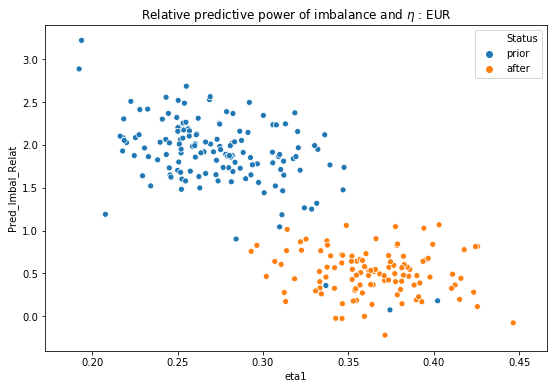

In [54]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Pred_Imbal_Relat', hue='Status',\
           data=IMBAL_STATS_TS);
plt.title('Relative predictive power of imbalance and $\eta$ : '+CURR);

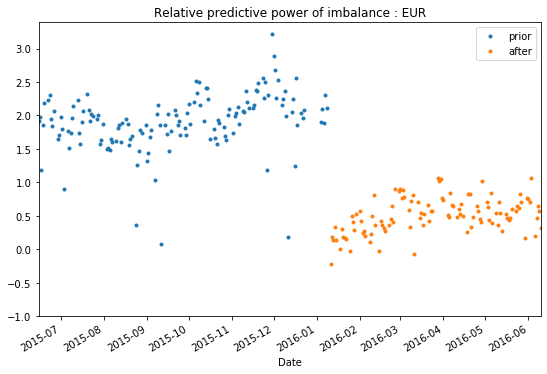

In [55]:
cme.time_series_plot(IMBAL_STATS_TS, 'Pred_Imbal_Relat',\
    'Relative predictive power of imbalance : '+CURR, -1)

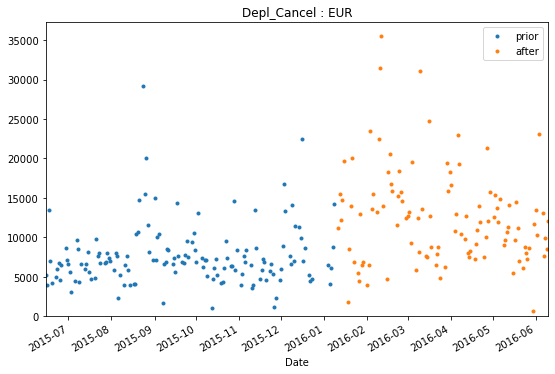

In [56]:
cme.time_series_plot(ABSDEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, -1)

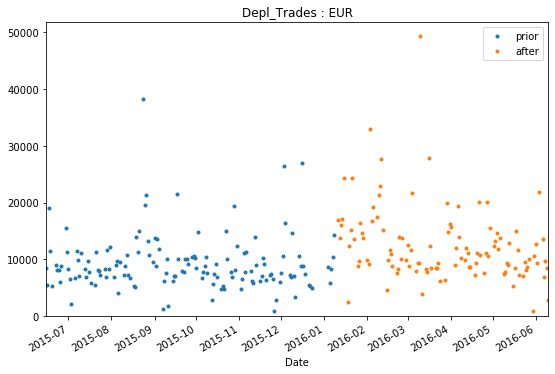

In [57]:
cme.time_series_plot(ABSDEPL_STATS_TS, 'Depl_Trades',\
    'Depl_Trades : '+CURR, -1)

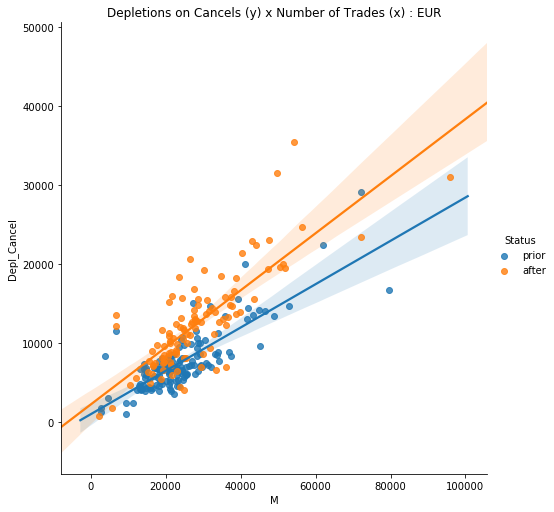

In [58]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Cancel',\
    'Depletions on Cancels (y) x Number of Trades (x) : '+CURR)

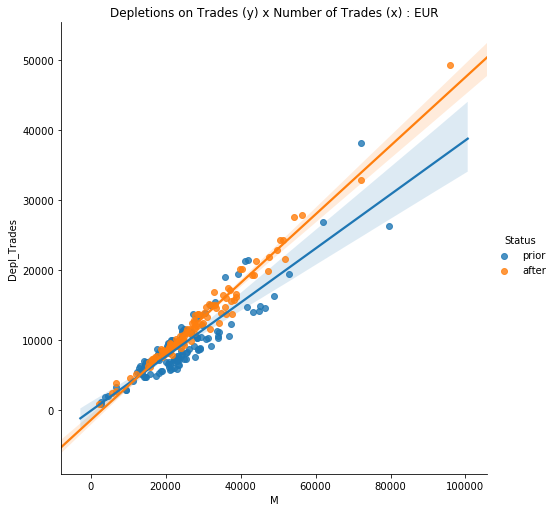

In [59]:
cme.regr_plot(ABSDEPL_STATS_TS, 'M', 'Depl_Trades',\
    'Depletions on Trades (y) x Number of Trades (x) : '+CURR)

In [60]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Cancel')

                            OLS Regression Results                            
Dep. Variable:            Depl_Cancel   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     377.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           7.21e-52
Time:                        13:26:21   Log-Likelihood:                -2408.7
No. Observations:                 252   AIC:                             4821.
Df Residuals:                     250   BIC:                             4828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        784.1652    507.592      1.545      0.1

/Users/marcoscscarreira/anaconda3/envs/CondaEnv36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
cme.lin_reg(ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2014.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):          1.26e-121
Time:                        13:26:21   Log-Likelihood:                -2264.9
No. Observations:                 252   AIC:                             4534.
Df Residuals:                     250   BIC:                             4541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -970.6831    286.948     -3.383      0.0

In [62]:
cme.lin_reg(PRIOR_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     644.6
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.89e-54
Time:                        13:26:21   Log-Likelihood:                -1292.9
No. Observations:                 143   AIC:                             2590.
Df Residuals:                     141   BIC:                             2596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.1414    405.704     -0.153      0.8

In [63]:
cme.lin_reg(AFTER_ABSDEPL_STATS_TS, ['M'], 'Depl_Trades')

                            OLS Regression Results                            
Dep. Variable:            Depl_Trades   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3544.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           7.54e-84
Time:                        13:26:21   Log-Likelihood:                -918.94
No. Observations:                 109   AIC:                             1842.
Df Residuals:                     107   BIC:                             1847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1395.1017    257.277     -5.423      0.0

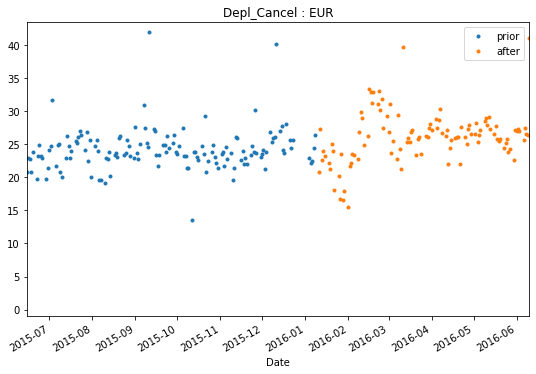

In [64]:
cme.time_series_plot(DEPL_STATS_TS, 'Depl_Cancel',\
    'Depl_Cancel : '+CURR, -1)

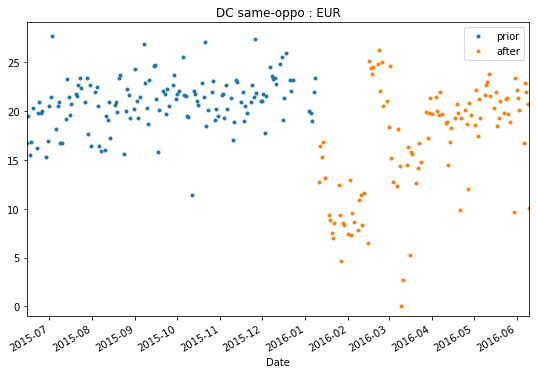

In [65]:
cme.time_series_plot(DEPL_STATS_TS, 'DC same-oppo',\
    'DC same-oppo : '+CURR, -1)

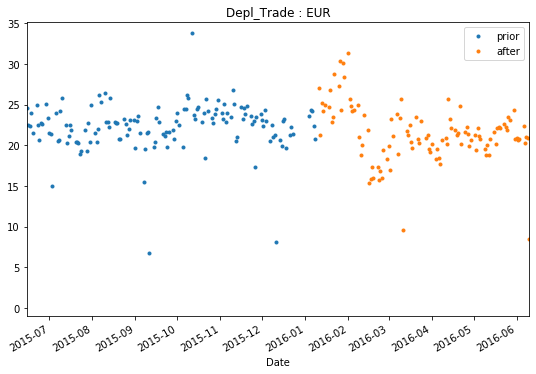

In [66]:
cme.time_series_plot(DEPL_STATS_TS, 'Depl_Trade',\
    'Depl_Trade : '+CURR, -1)

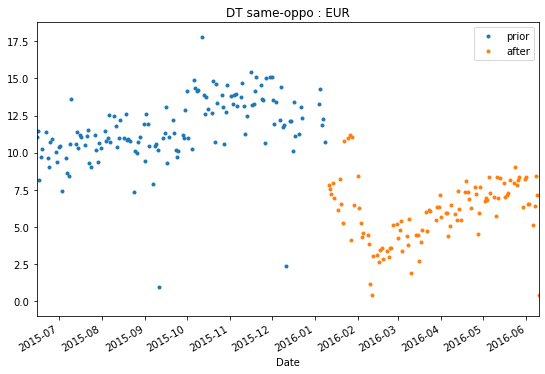

In [67]:
cme.time_series_plot(DEPL_STATS_TS, 'DT same-oppo',\
    'DT same-oppo : '+CURR, -1)

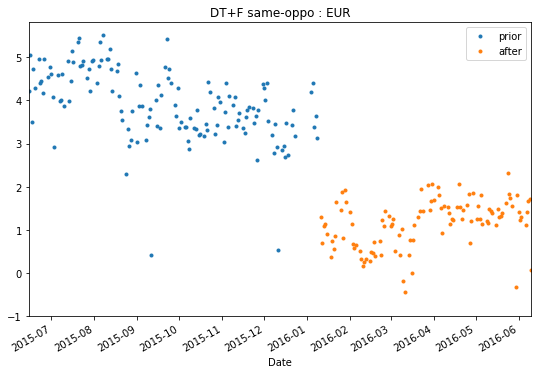

In [68]:
cme.time_series_plot(DEPL_STATS_TS, 'DT+F same-oppo',\
    'DT+F same-oppo : '+CURR, -1)

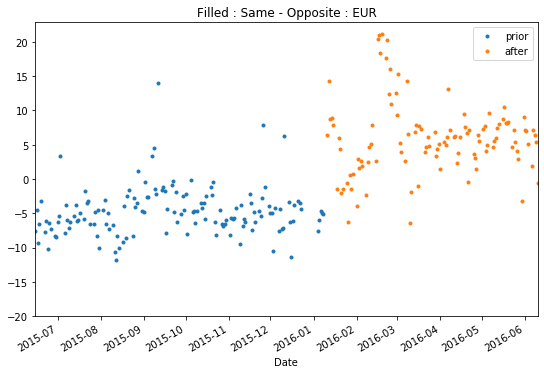

In [69]:
cme.time_series_plot(DEPL_STATS_TS, 'Fill same-oppo',\
    'Filled : Same - Opposite : '+CURR, -20)

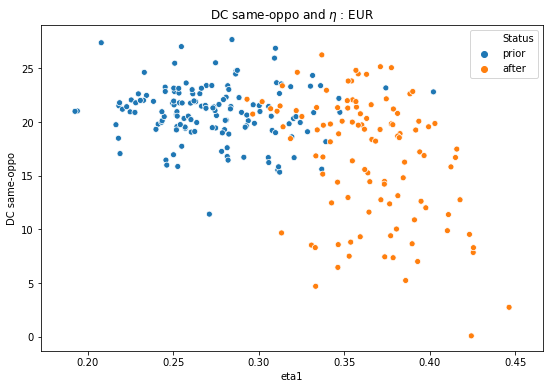

In [70]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DC same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DC same-oppo and $\eta$ : '+CURR);

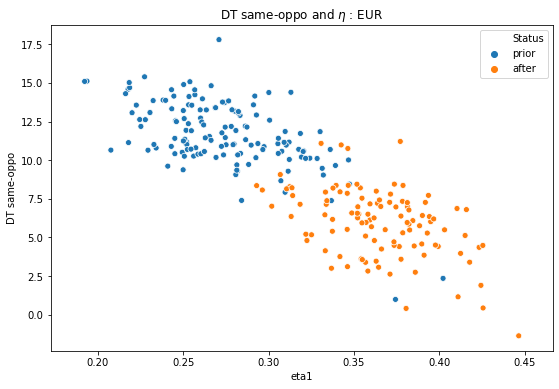

In [71]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT same-oppo and $\eta$ : '+CURR);

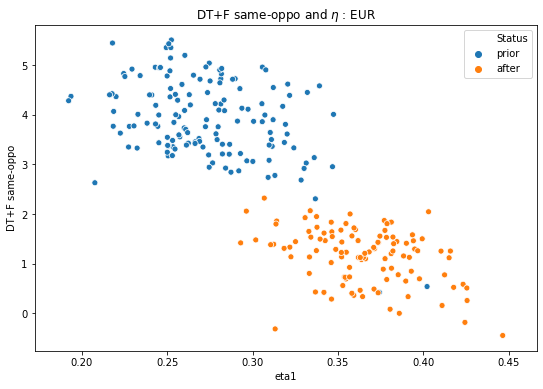

In [72]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='DT+F same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('DT+F same-oppo and $\eta$ : '+CURR);

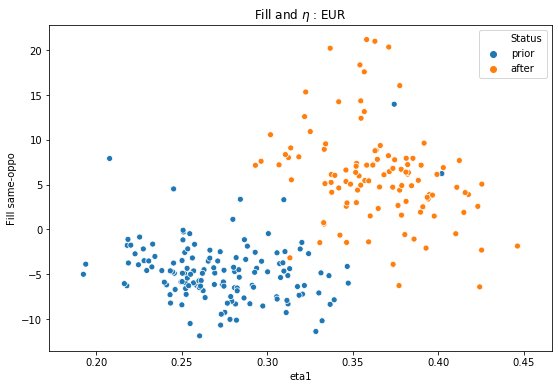

In [73]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='eta1', y='Fill same-oppo', hue='Status',\
           data=DEPL_STATS_TS);
plt.title('Fill and $\eta$ : '+CURR);

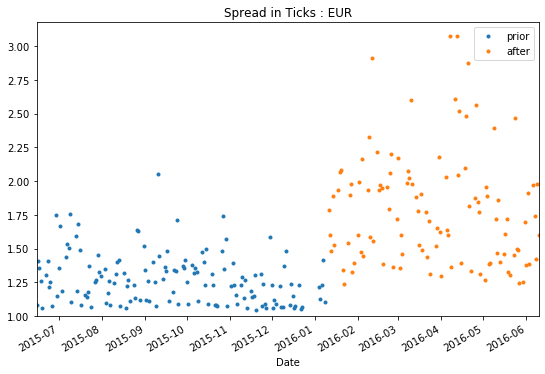

In [74]:
cme.time_series_plot(OB_UZ_STATS, 'twspr1', 'Spread in Ticks : '+CURR, 1)

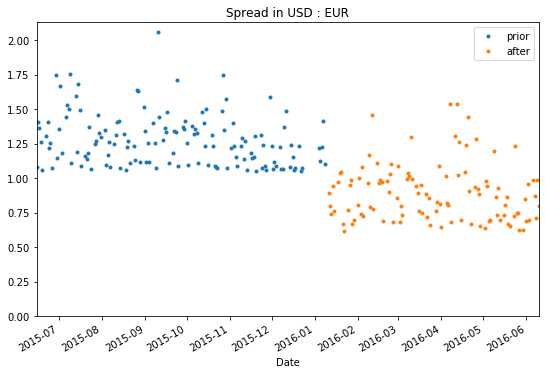

In [75]:
cme.twspr_plot_USD(OB_UZ_STATS, CURR)

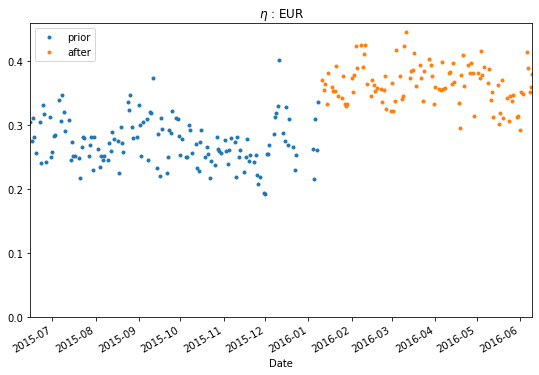

In [76]:
cme.time_series_plot(OB_UZ_STATS, 'eta1', '$\eta$ : '+CURR)

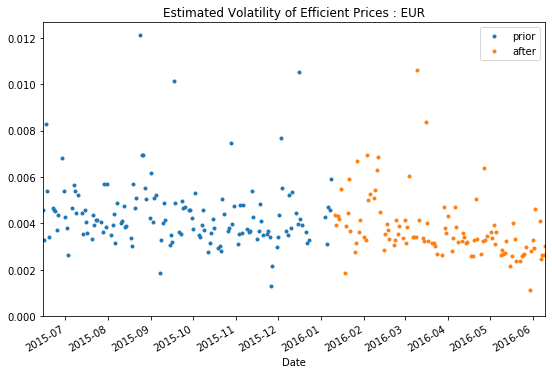

In [77]:
cme.time_series_plot(OB_UZ_STATS, 'rvxe',\
    'Estimated Volatility of Efficient Prices : '+CURR)

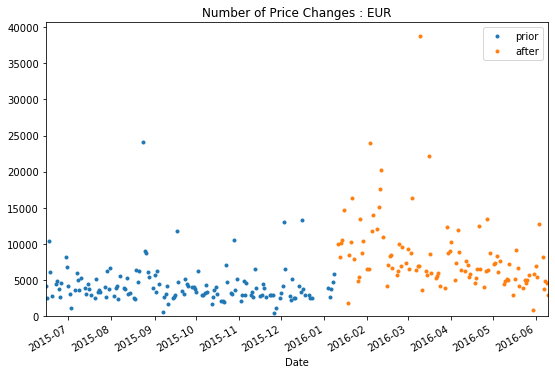

In [78]:
cme.time_series_plot(OB_UZ_STATS, 'ndfpr',\
    'Number of Price Changes : '+CURR)

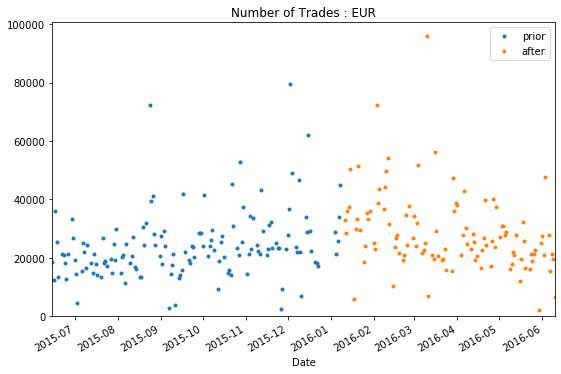

In [79]:
cme.time_series_plot(OB_UZ_STATS, 'M',\
    'Number of Trades : '+CURR)

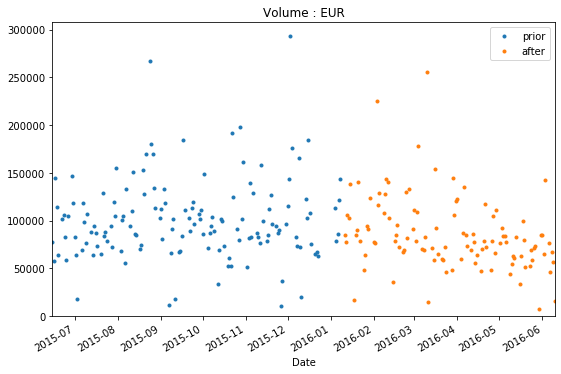

In [80]:
cme.time_series_plot(OB_UZ_STATS, 'Volume',\
    'Volume : '+CURR)

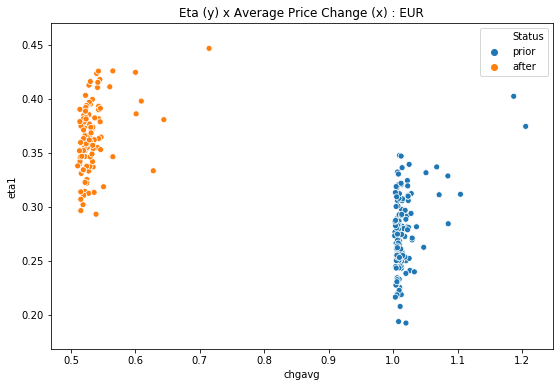

In [81]:
cme.scatter_plot(OB_UZ_STATS, 'chgavg', 'eta1',\
    'Eta (y) x Average Price Change (x) : '+CURR)

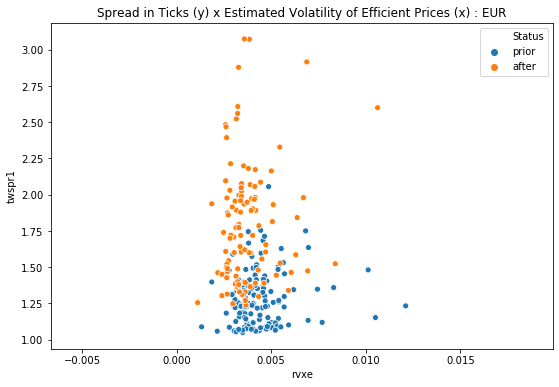

In [82]:
cme.scatter_plot(OB_UZ_STATS, 'rvxe', 'twspr1',\
    'Spread in Ticks (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

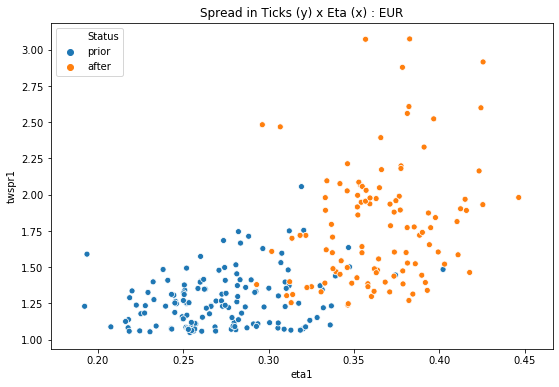

In [83]:
cme.scatter_plot(OB_UZ_STATS, 'eta1', 'twspr1',\
    'Spread in Ticks (y) x Eta (x) : '+CURR)

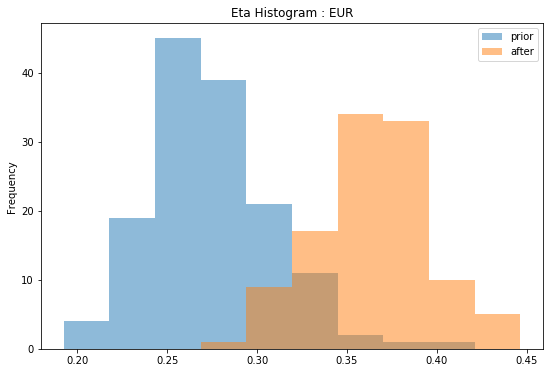

In [84]:
cme.time_series_hist(OB_UZ_STATS, 'eta1',\
    'Eta Histogram : '+CURR)

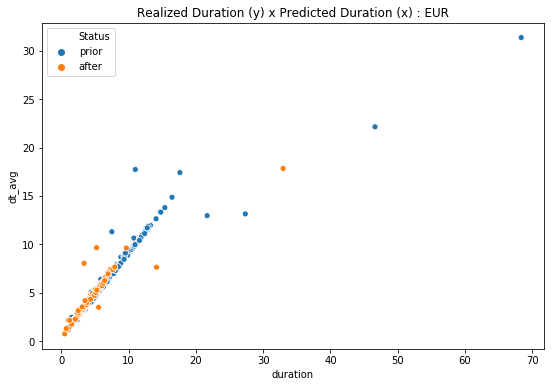

In [85]:
cme.scatter_plot(OB_UZ_STATS, 'duration', 'dt_avg',\
    'Realized Duration (y) x Predicted Duration (x) : '+CURR)

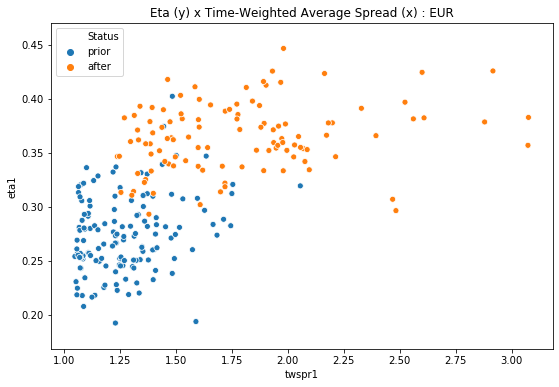

In [86]:
cme.scatter_plot(OB_UZ_STATS, 'twspr1', 'eta1',\
    'Eta (y) x Time-Weighted Average Spread (x) : '+CURR)

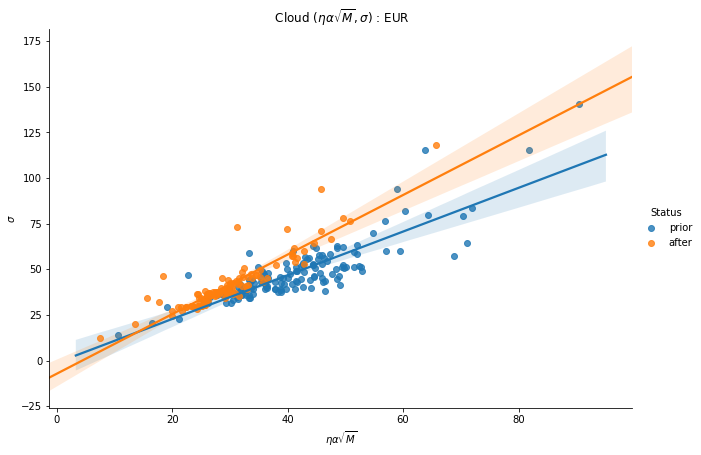

In [87]:
cme.cloud1(OB_UZ_STATS, CURR)

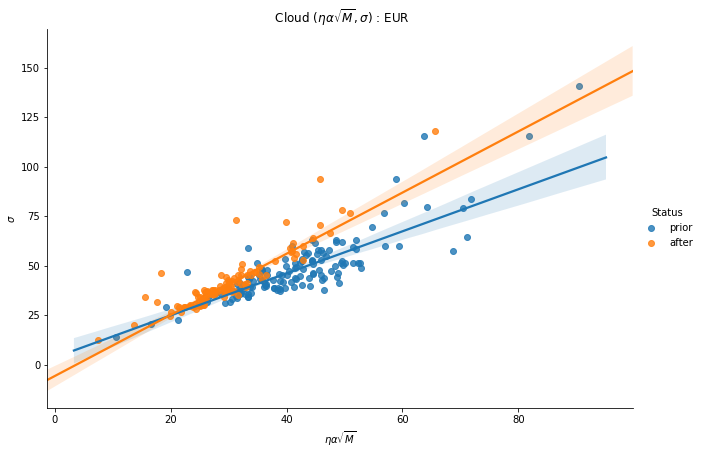

In [88]:
cme.cloud1(OB_UZ_STATS, CURR, True)

In [89]:
cme.lin_reg(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.47e-41
Time:                        13:26:38   Log-Likelihood:                -506.90
No. Observations:                 143   AIC:                             1020.
Df Residuals:                     140   BIC:                             1029.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.7800      2.91

In [90]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  143
Model:                            RLM   Df Residuals:                      140
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:38                                         
No. Iterations:                    21                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.6416      2.20

In [91]:
cme.lin_reg(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                            OLS Regression Results                            
Dep. Variable:                  sigma   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     245.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.67e-40
Time:                        13:26:38   Log-Likelihood:                -352.85
No. Observations:                 109   AIC:                             711.7
Df Residuals:                     106   BIC:                             719.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.4048      2.30

In [92]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')

                    Robust linear Model Regression Results                    
Dep. Variable:                  sigma   No. Observations:                  109
Model:                            RLM   Df Residuals:                      106
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:38                                         
No. Iterations:                    32                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.1882      1.29

In [93]:
OB_UZ_STATS['p1*eta*alpha*sqrt(M)'] = np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['eta*alpha*sqrt(M)'])\
    *OB_UZ_STATS['eta*alpha*sqrt(M)']
OB_UZ_STATS['sigma-p2*S*sqrt(M)'] = OB_UZ_STATS['sigma']-\
    np.where(OB_UZ_STATS['Status']=='prior',\
    cme.lin_reg_params(PRIOR_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'],\
    cme.lin_reg_params(AFTER_OB_UZ_STATS, ['eta*alpha*sqrt(M)', 'S*sqrt(M)'], 'sigma')['S*sqrt(M)'])*\
    OB_UZ_STATS['S*sqrt(M)']

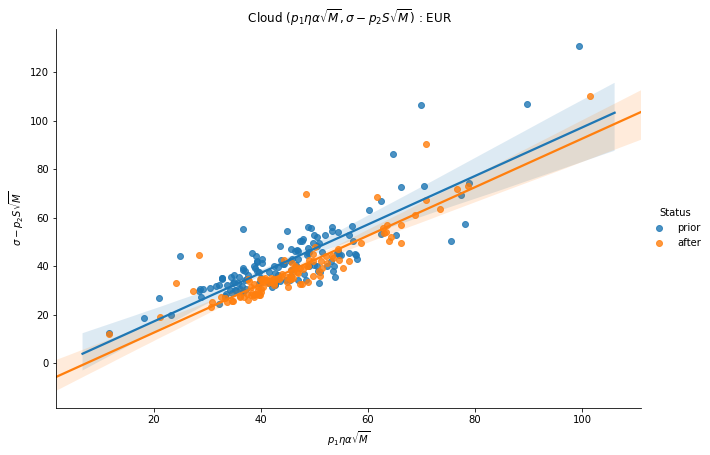

In [94]:
cme.cloud2(OB_UZ_STATS, CURR)

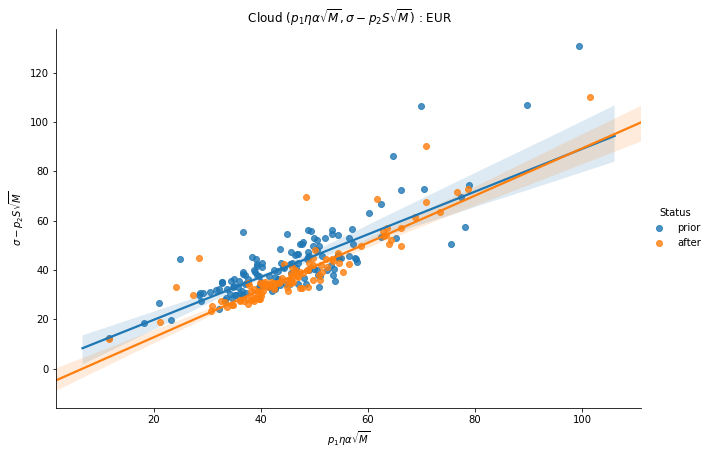

In [95]:
cme.cloud2(OB_UZ_STATS, CURR, True)

In [96]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     326.7
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.54e-38
Time:                        13:26:49   Log-Likelihood:                -506.90
No. Observations:                 143   AIC:                             1018.
Df Residuals:                     141   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7800 

In [97]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='prior'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:49                                         
No. Iterations:                    20                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.4962 

In [98]:
cme.lin_reg(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                            OLS Regression Results                            
Dep. Variable:     sigma-p2*S*sqrt(M)   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     443.2
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           7.71e-40
Time:                        13:26:49   Log-Likelihood:                -352.85
No. Observations:                 109   AIC:                             709.7
Df Residuals:                     107   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.4048 

In [99]:
cme.lin_reg_rob(OB_UZ_STATS[OB_UZ_STATS['Status']=='after'], ['p1*eta*alpha*sqrt(M)'], 'sigma-p2*S*sqrt(M)')

                    Robust linear Model Regression Results                    
Dep. Variable:     sigma-p2*S*sqrt(M)   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:50                                         
No. Iterations:                    23                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.3981 

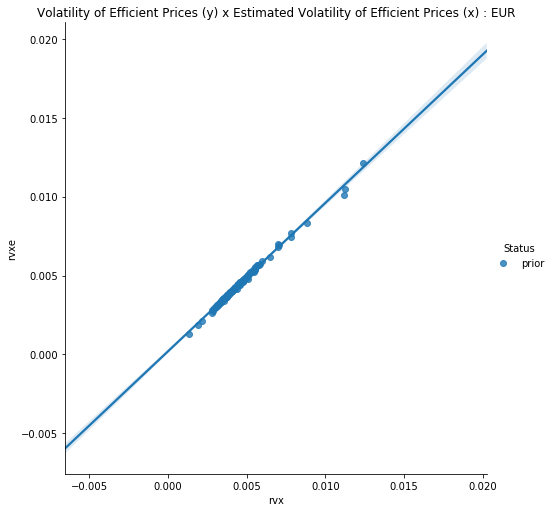

In [100]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe',\
    'Volatility of Efficient Prices (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

In [101]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvx', 'rvxe', True)

                            OLS Regression Results                            
Dep. Variable:                   rvxe   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.359e+04
Date:                Mon, 02 Sep 2019   Prob (F-statistic):          1.50e-193
Time:                        13:26:50   Log-Likelihood:                 423.82
No. Observations:                 143   AIC:                            -843.6
Df Residuals:                     141   BIC:                            -837.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1443      0.020     -7.338      0.0

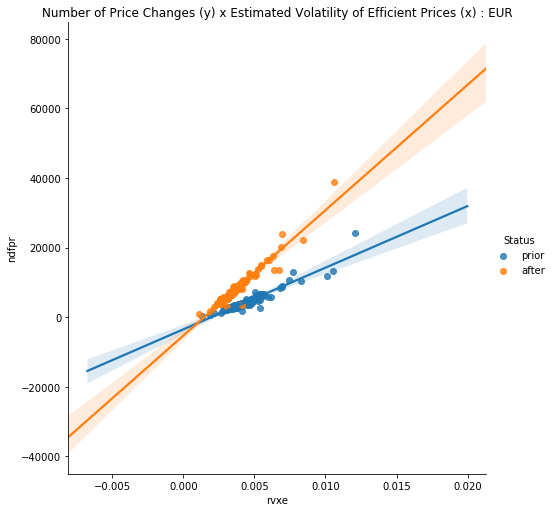

In [102]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

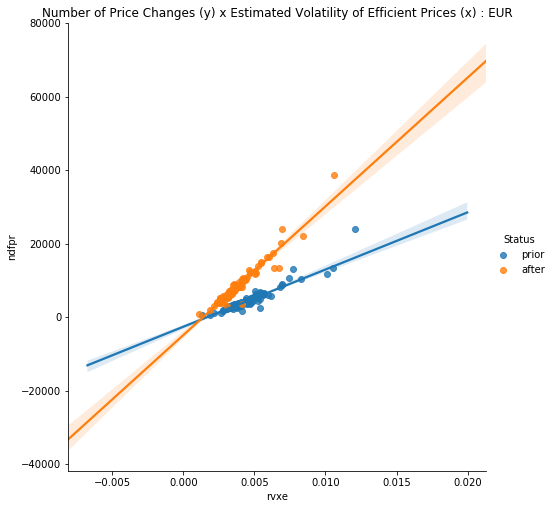

In [103]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'ndfpr',\
    'Number of Price Changes (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [104]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1386.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           8.01e-75
Time:                        13:26:57   Log-Likelihood:                 66.444
No. Observations:                 143   AIC:                            -128.9
Df Residuals:                     141   BIC:                            -123.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3604      0.246     70.669      0.0

In [105]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:57                                         
No. Iterations:                    21                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3966      0.186     93.728      0.0

In [106]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1121.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.60e-58
Time:                        13:26:57   Log-Likelihood:                 51.426
No. Observations:                 109   AIC:                            -98.85
Df Residuals:                     107   BIC:                            -93.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8327      0.268     66.601      0.0

In [107]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'ndfpr', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:26:58                                         
No. Iterations:                    18                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.8406      0.154    116.047      0.0

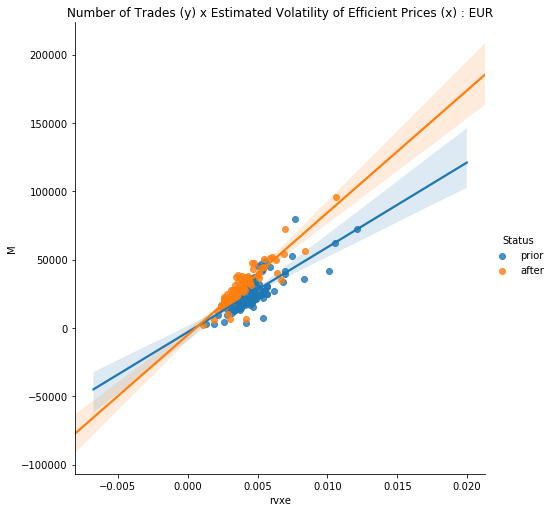

In [108]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR)

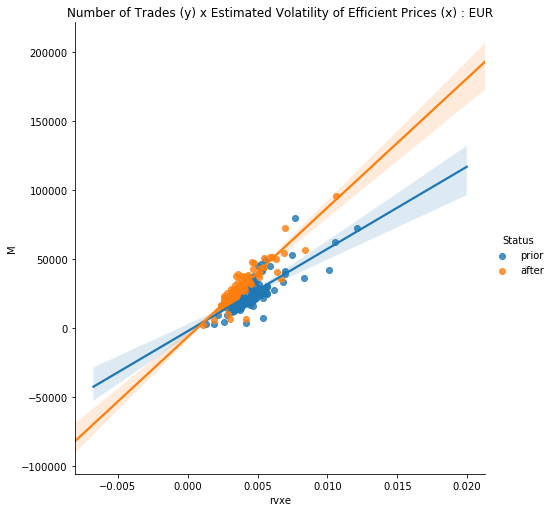

In [109]:
cme.regr_plot(OB_UZ_STATS, 'rvxe', 'M',\
    'Number of Trades (y) x Estimated Volatility of Efficient Prices (x) : '+CURR, True)

In [110]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.98e-27
Time:                        13:27:02   Log-Likelihood:                -43.940
No. Observations:                 143   AIC:                             91.88
Df Residuals:                     141   BIC:                             97.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1193      0.532     32.205      0.0

In [111]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:02                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6621      0.426     39.139      0.0

In [112]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     263.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.28e-30
Time:                        13:27:02   Log-Likelihood:                -9.5055
No. Observations:                 109   AIC:                             23.01
Df Residuals:                     107   BIC:                             28.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7391      0.468     37.881      0.0

In [113]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'rvxe', 'M', True)

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:02                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2694      0.271     63.676      0.0

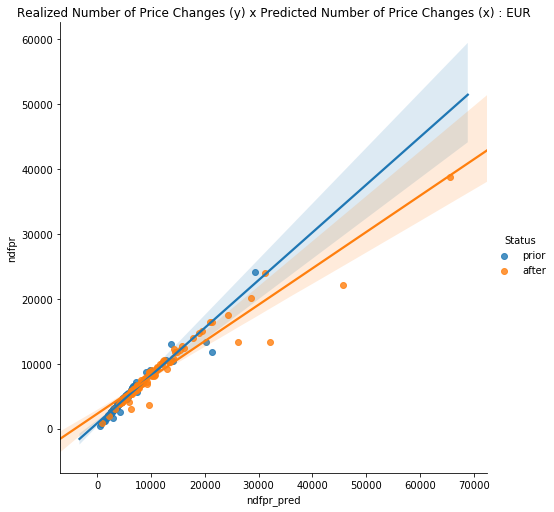

In [114]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR)

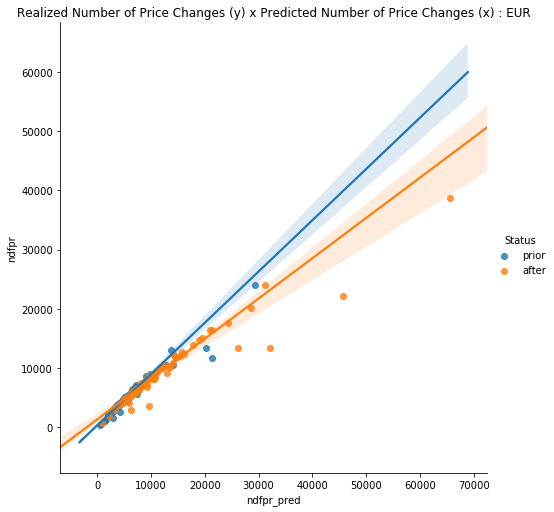

In [115]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr_pred', 'ndfpr',\
    'Realized Number of Price Changes (y) x Predicted Number of Price Changes (x) : '+CURR, True)

In [116]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2440.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           6.78e-91
Time:                        13:27:16   Log-Likelihood:                -1123.4
No. Observations:                 143   AIC:                             2251.
Df Residuals:                     141   BIC:                             2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        836.3319     87.021      9.611      0.0

In [117]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:16                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        355.8448     23.254     15.303      0.0

In [118]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                            OLS Regression Results                            
Dep. Variable:                  ndfpr   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1249.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           7.81e-61
Time:                        13:27:16   Log-Likelihood:                -943.11
No. Observations:                 109   AIC:                             1890.
Df Residuals:                     107   BIC:                             1896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2291.1968    214.544     10.679      0.0

In [119]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr_pred', 'ndfpr')

                    Robust linear Model Regression Results                    
Dep. Variable:                  ndfpr   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:16                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1355.8784     77.537     17.487      0.0

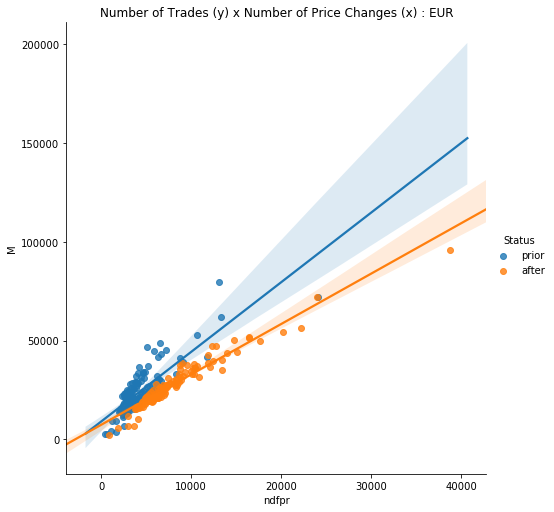

In [120]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR)

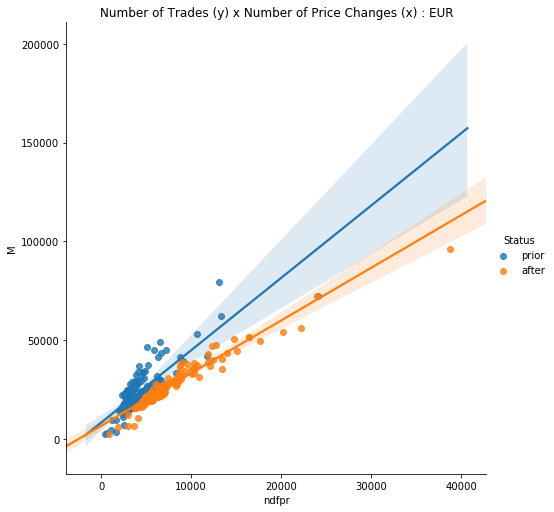

In [121]:
cme.regr_plot(OB_UZ_STATS, 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

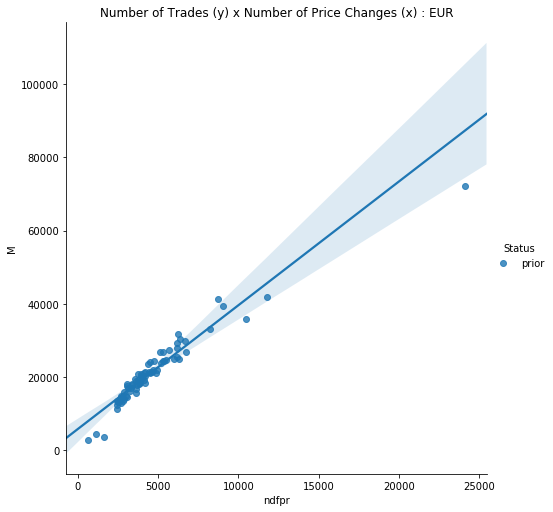

In [122]:
cme.regr_plot(OB_UZ_STATS.loc[:'2015-09-26'], 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

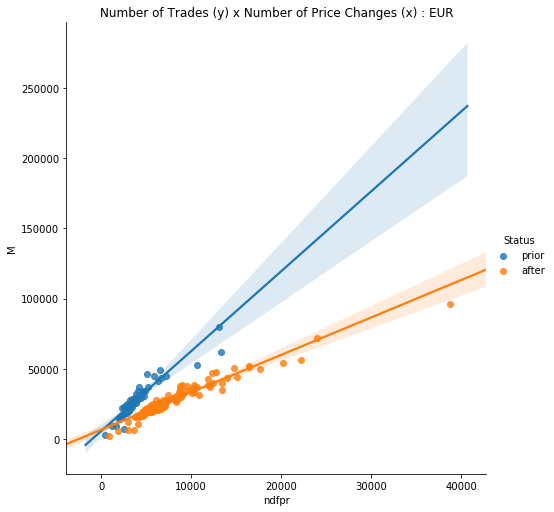

In [123]:
cme.regr_plot(OB_UZ_STATS.loc['2015-09-26':], 'ndfpr', 'M',\
    'Number of Trades (y) x Number of Price Changes (x) : '+CURR, True)

In [124]:
cme.lin_reg(PRIOR_OB_UZ_STATS.loc[:'2015-09-26'], 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     863.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           3.51e-42
Time:                        13:27:31   Log-Likelihood:                -697.81
No. Observations:                  75   AIC:                             1400.
Df Residuals:                      73   BIC:                             1404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7050.4433    574.189     12.279      0.0

In [125]:
cme.lin_reg(PRIOR_OB_UZ_STATS.loc['2015-09-26':], 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     479.9
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.47e-32
Time:                        13:27:31   Log-Likelihood:                -664.63
No. Observations:                  68   AIC:                             1333.
Df Residuals:                      66   BIC:                             1338.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7377.8342   1051.393      7.017      0.0

In [126]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     318.5
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.42e-38
Time:                        13:27:31   Log-Likelihood:                -1453.1
No. Observations:                 143   AIC:                             2910.
Df Residuals:                     141   BIC:                             2916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9130.7797    992.942      9.196      0.0

In [127]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:31                                         
No. Iterations:                     5                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8283.5702    889.797      9.310      0.0

In [128]:
cme.lin_reg(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                            OLS Regression Results                            
Dep. Variable:                      M   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     1425.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.14e-63
Time:                        13:27:31   Log-Likelihood:                -1042.4
No. Observations:                 109   AIC:                             2089.
Df Residuals:                     107   BIC:                             2094.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7469.9713    647.089     11.544      0.0

In [129]:
cme.lin_reg_rob(AFTER_OB_UZ_STATS, 'ndfpr', 'M')

                    Robust linear Model Regression Results                    
Dep. Variable:                      M   No. Observations:                  109
Model:                            RLM   Df Residuals:                      107
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:31                                         
No. Iterations:                    11                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6670.4710    512.954     13.004      0.0

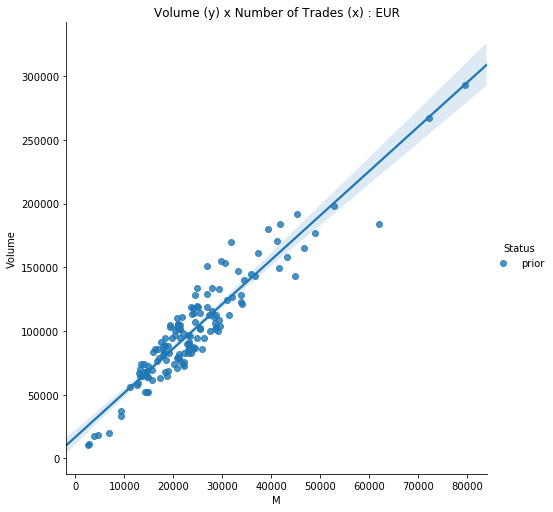

In [130]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR)

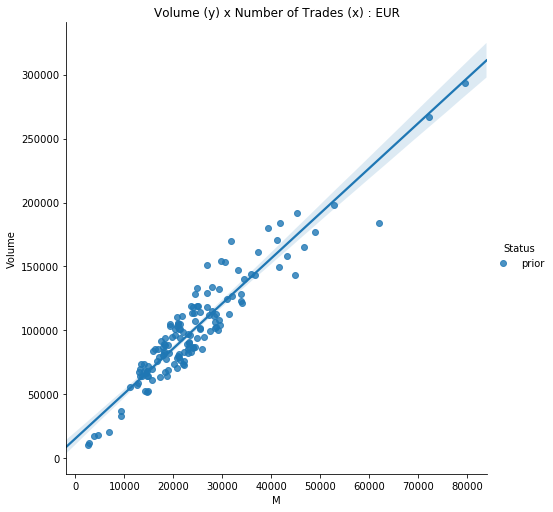

In [131]:
cme.regr_plot(PRIOR_OB_UZ_STATS, 'M', 'Volume',\
    'Volume (y) x Number of Trades (x) : '+CURR, True)

In [132]:
cme.lin_reg(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           3.61e-67
Time:                        13:27:33   Log-Likelihood:                -1572.4
No. Observations:                 143   AIC:                             3149.
Df Residuals:                     141   BIC:                             3155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+04   2862.788      5.875      0.0

In [133]:
cme.lin_reg_rob(PRIOR_OB_UZ_STATS, 'M', 'Volume')

                    Robust linear Model Regression Results                    
Dep. Variable:                 Volume   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:33                                         
No. Iterations:                     3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.552e+04   2708.061      5.731      0.0

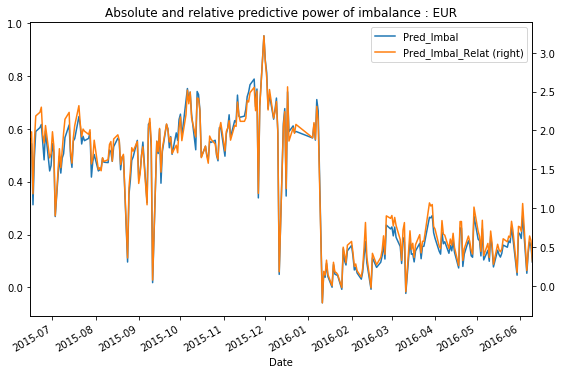

In [134]:
IMBAL_STATS_TS.drop(columns=['eta1']).plot(secondary_y=['Pred_Imbal_Relat'],\
    figsize=(9,6), title='Absolute and relative predictive power of imbalance : EUR');

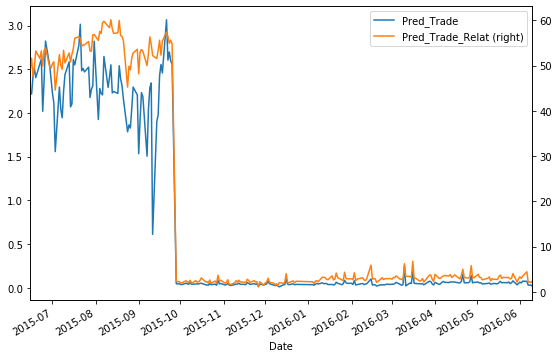

In [135]:
TRADE_STATS_TS.plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

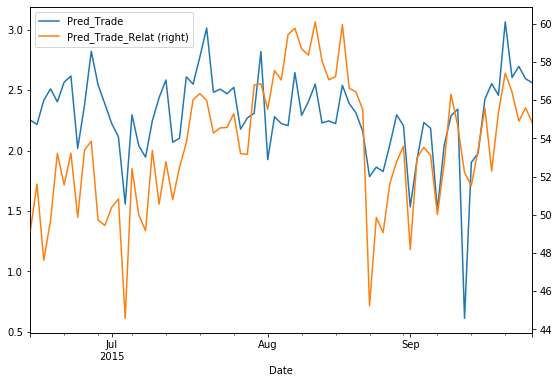

In [136]:
TRADE_STATS_TS.loc[:'2015-09-26'].plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

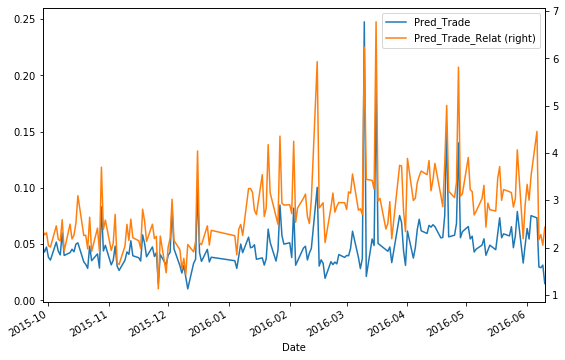

In [137]:
TRADE_STATS_TS.loc['2015-09-26':].plot(secondary_y=['Pred_Trade_Relat'], figsize=(9,6));

In [138]:
OB_UZ_STATS_SPREADS = cme.spread_stats(OB_UZ_STATS)

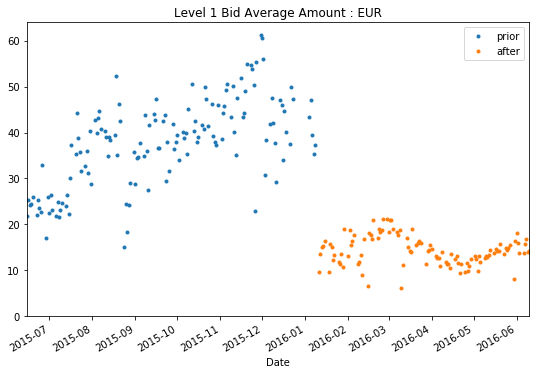

In [139]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'bid1qty',\
    'Level 1 Bid Average Amount : '+CURR)

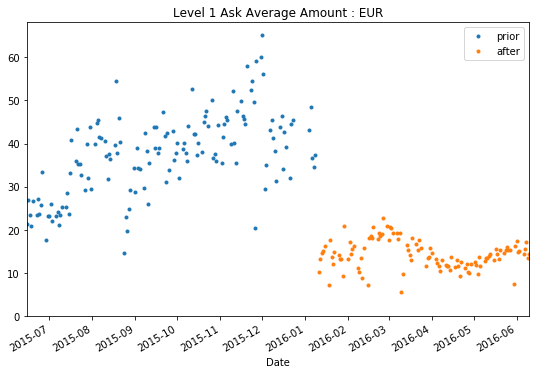

In [140]:
cme.time_series_plot(OB_UZ_STATS_SPREADS, 'ask1qty',\
    'Level 1 Ask Average Amount : '+CURR)

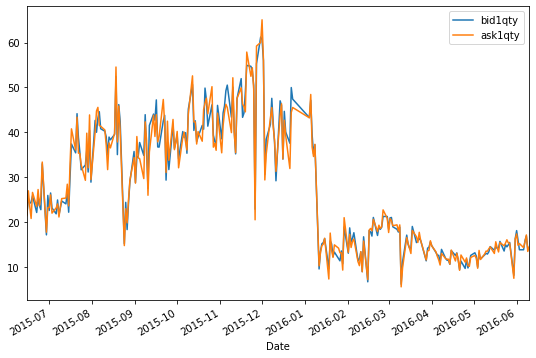

In [141]:
OB_UZ_STATS_SPREADS[['bid1qty', 'ask1qty']].plot(figsize=(9,6));

In [142]:
OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'prior'][['bid1qty', 'ask1qty']].mean()/\
    OB_UZ_STATS_SPREADS[OB_UZ_STATS_SPREADS['Status'] == 'after'][['bid1qty', 'ask1qty']].mean()

bid1qty    2.636291
ask1qty    2.621342
dtype: float64

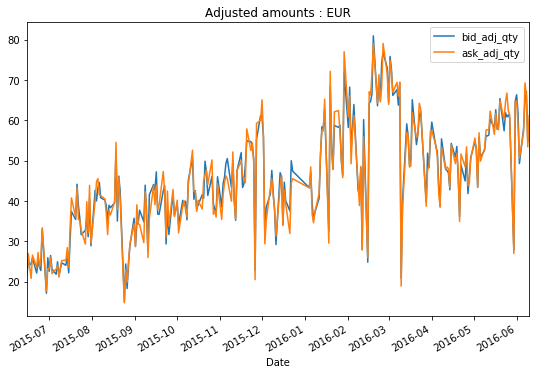

In [143]:
OB_UZ_STATS_SPREADS[['bid_adj_qty', 'ask_adj_qty']].plot(figsize=(9,6),\
    title='Adjusted amounts : '+CURR);

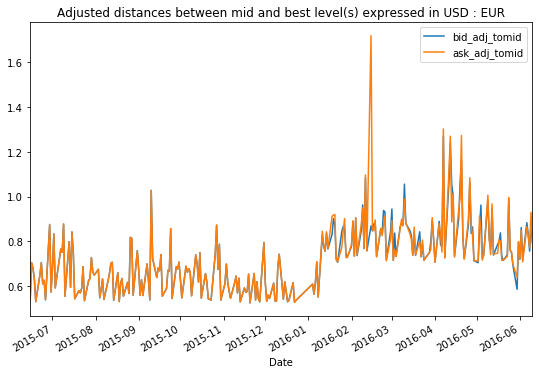

In [144]:
OB_UZ_STATS_SPREADS[['bid_adj_tomid', 'ask_adj_tomid']].plot(figsize=(9,6),\
    title='Adjusted distances between mid and best level(s) expressed in USD : '+CURR);

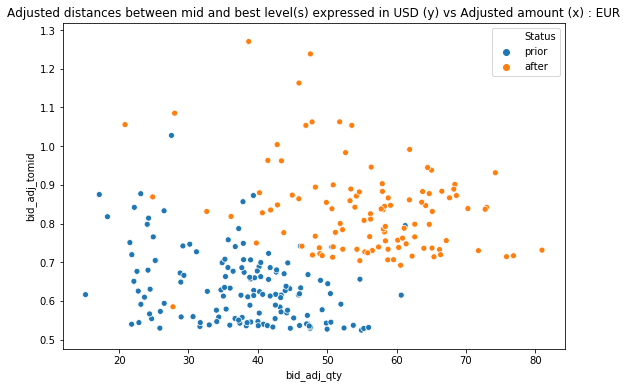

In [145]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='bid_adj_qty', y='bid_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);
plt.title('Adjusted distances between mid and best level(s) expressed in USD (y) vs Adjusted amount (x) : '+CURR);

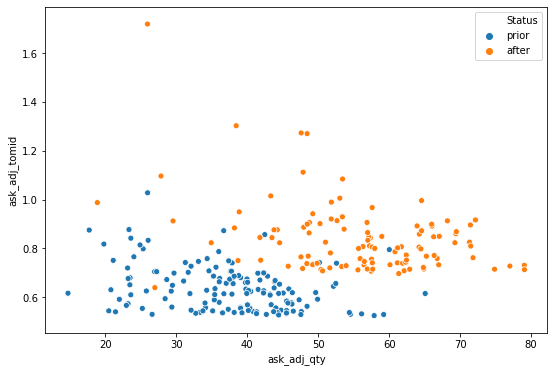

In [146]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x='ask_adj_qty', y='ask_adj_tomid',\
                hue='Status', data=OB_UZ_STATS_SPREADS);

### Costs

In [147]:
PRIOR_MEAN_COST = cme.cost_mean(PRIOR_COST_STATS, 100)

In [148]:
PRIOR_MEAN_COST['Status'] = 'prior'

In [149]:
AFTER_MEAN_COST = cme.cost_mean(AFTER_COST_STATS, 100)

In [150]:
AFTER_MEAN_COST['Status'] = 'after'

In [151]:
MEAN_COST_STATS = pd.concat([PRIOR_MEAN_COST, AFTER_MEAN_COST], sort=False)

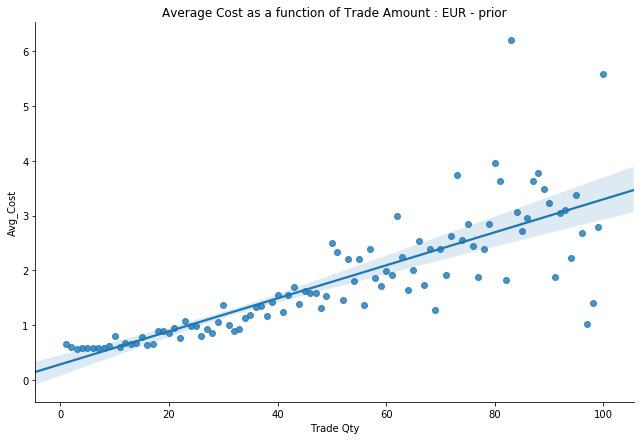

In [152]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

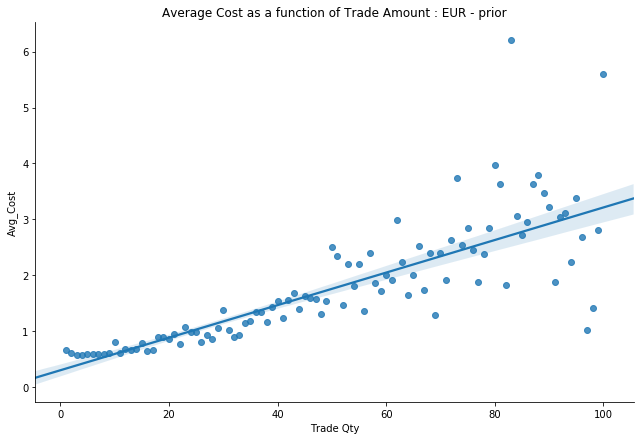

In [153]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=PRIOR_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - prior');

In [154]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.20e-18
Time:                        13:27:43   Log-Likelihood:                 14.103
No. Observations:                  50   AIC:                            -24.21
Df Residuals:                      48   BIC:                            -20.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3910      0.053      7.311      0.0

In [155]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:43                                         
No. Iterations:                    19                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4206      0.041     10.210      0.0

In [156]:
cme.lin_reg(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           6.49e-24
Time:                        13:27:43   Log-Likelihood:                -97.628
No. Observations:                 100   AIC:                             199.3
Df Residuals:                      98   BIC:                             204.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2835      0.131      2.168      0.0

In [157]:
cme.lin_reg_rob(cme.cost_mean(PRIOR_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:43                                         
No. Iterations:                    20                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2973      0.068      4.348      0.0

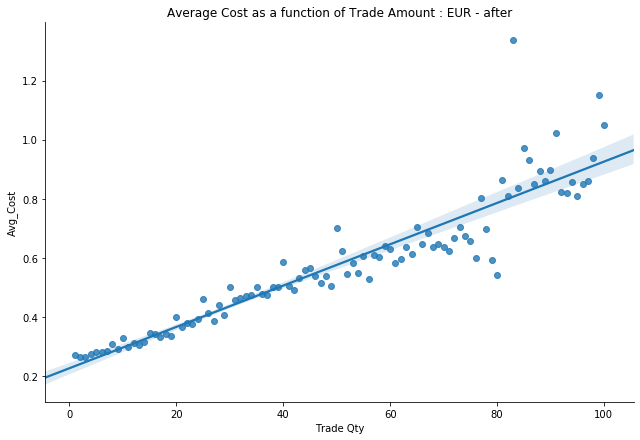

In [158]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

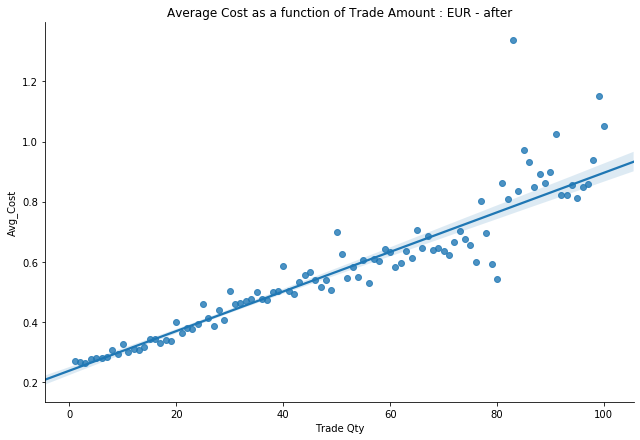

In [159]:
sns.lmplot(x='Trade Qty', y='Avg_Cost', data=AFTER_MEAN_COST.reset_index(),\
          height=6, aspect=1.5, robust=True);
plt.title('Average Cost as a function of Trade Amount : '+CURR+' - after');

In [160]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     520.8
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           2.03e-27
Time:                        13:27:50   Log-Likelihood:                 104.31
No. Observations:                  50   AIC:                            -204.6
Df Residuals:                      48   BIC:                            -200.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2386      0.009     27.100      0.0

In [161]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 50).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                   50
Model:                            RLM   Df Residuals:                       48
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:50                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2412      0.006     38.492      0.0

In [162]:
cme.lin_reg(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                            OLS Regression Results                            
Dep. Variable:               Avg_Cost   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.6
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           6.65e-43
Time:                        13:27:50   Log-Likelihood:                 106.97
No. Observations:                 100   AIC:                            -209.9
Df Residuals:                      98   BIC:                            -204.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2269      0.017     13.423      0.0

In [163]:
cme.lin_reg_rob(cme.cost_mean(AFTER_COST_STATS, 100).reset_index(), 'Trade Qty', 'Avg_Cost')

                    Robust linear Model Regression Results                    
Dep. Variable:               Avg_Cost   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 02 Sep 2019                                         
Time:                        13:27:50                                         
No. Iterations:                    31                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2386      0.009     25.613      0.0

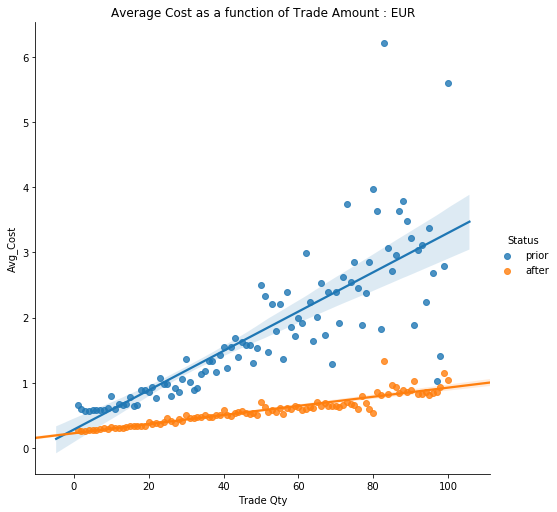

In [164]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR)

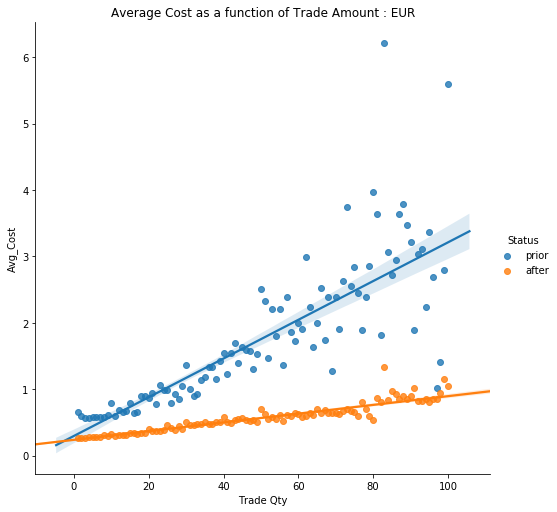

In [165]:
cme.regr_plot(MEAN_COST_STATS.reset_index(), 'Trade Qty', 'Avg_Cost',\
    'Average Cost as a function of Trade Amount : '+CURR, True)

## Eta prediction

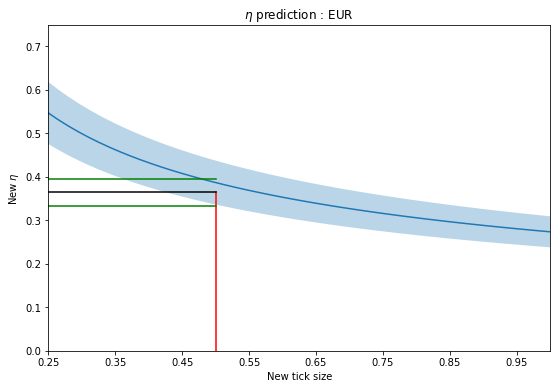

In [166]:
cme.plot_eta(TICK_PRIOR, TICK_AFTER,\
    TABLE_MATHIEU.loc['prior']['eta1'], TABLE_MATHIEU.loc['after']['eta1'],\
    TABLE_MATHIEU_ERR.loc['prior']['eta1'], TABLE_MATHIEU_ERR.loc['after']['eta1'],\
    CURR)